# Project - 3: **SpaceX Falcon 9 First Stage Landing Prediction** 

## Part 5: Machine learning prediction

SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollar each, much of savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. THis information can be used if an alternate company wants to bid against spaceX for a rocket launch. In this excersie let's create a machine learning pipeline to predict if the fist stage will land given data from the preceeding excersises.

### Objectives
Perform exploratory Data Analysis and determine Training labels
- Create a column for the class
- Standardize the data
- Split into training data and test data
- Find the best hyperparameter for SVM, Classification Trees and Logistic Regression
- Find which method performs best using test data


In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load the dataset
URL1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
data = pd.read_csv(URL1)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Create a Numpy array from the column `class` in data, by applying the method to_numpy() then assign it to the variable Y, make sure the output is a pandas series

In [5]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [6]:
#standardize the data in dataframe X
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

Let's split the data into training and testing data using the function `train_test_split`. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function `GridSearchCV`.

Use the function `train_test_split` to split the data X and Y into training and test data. Set the paramter test_size to 0.2 and random_state to 2.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [8]:
y_test.shape

(18,)

We have 18 test samples

Create a logistic regression object then create a GridSearchCV object `logreg_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

In [10]:
#define the paramter grid
parameters = {'C':[0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

In [12]:
#create a logistic regression object
logreg = LogisticRegression()

#create the GridSearchCV object with 10-folds cross validation
logreg_cv = GridSearchCV(logreg, parameters, cv = 10)

# fit the GridSearchCV ohject to find the best parameters
logreg_cv.fit(X,Y)

#display the best parameters found
print('Best Parameters:', logreg_cv.best_params_)
print('Accuracy: ', logreg_cv.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.8222222222222222


In [13]:
accuracy_test = logreg_cv.score(X_test, y_test)
accuracy_test

0.9444444444444444

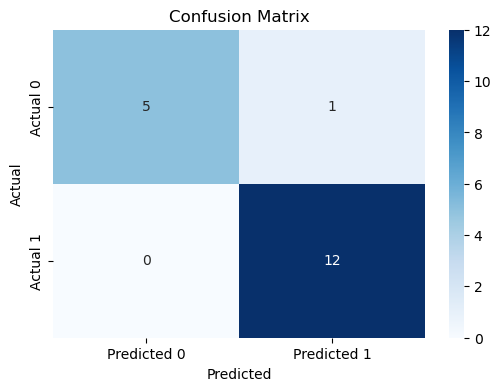

In [16]:
from sklearn.metrics import confusion_matrix
#confusion matrix
yhat = logreg_cv.predict(X_test)

cm = confusion_matrix(y_test, yhat)

#plot the confusion matrix
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Examing the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the problem is false positives.

Overview:

- True Positive - 12 (True label is landed, predicted label is also landed)
- False Positive - 3 (True label is not landed, Predicted label is Landed)

#### Creat a support vector machine object then create a `GridSearchCV` object `svm_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

In [21]:
parameters = {'kernel': ('linear', 'rbf', 'ploy', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv = 10)

svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_

print('Best Parameters found:', best_params)

Best Parameters found: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}


C:\Users\ABID\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
250 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABID\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABID\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\ABID\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    validat

In [22]:
print('Accuracy: ', svm_cv.best_score_)

Accuracy:  0.8482142857142856


In [24]:
accuracy_test_svm = svm_cv.score(X_test, y_test)
accuracy_test_svm

0.8333333333333334

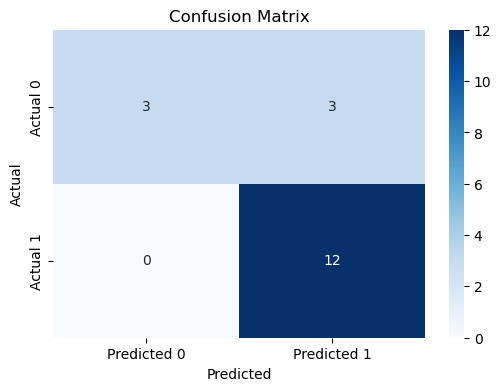

In [25]:
from sklearn.metrics import confusion_matrix

#confusion matrix
yhat_svm = svm_cv.predict(X_test)

cm_svm = confusion_matrix(y_test, yhat_svm)

#plot the confusion matrix
plt.figure(figsize = (6,4))
sns.heatmap(cm_svm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Create a tree classifier object then create a `GridSearchCV` object `tree_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

In [27]:
#desicion tree classifier
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2,5,10]}
tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv = 10)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_

print('Best Parameters found:', best_params)
print('Accuracy: ', tree_cv.best_score_)

Best Parameters found: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy:  0.8607142857142855


C:\Users\ABID\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABID\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABID\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\ABID\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    valid

In [29]:
accuracy_test_tree = tree_cv.score(X_train, y_train)
accuracy_test_tree

0.8611111111111112

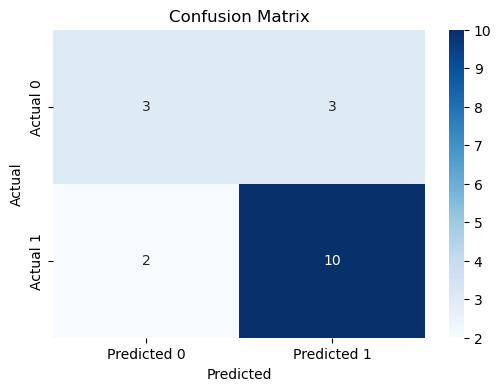

In [30]:
from sklearn.metrics import confusion_matrix

#confusion matrix
yhat_tree = tree_cv.predict(X_test)

cm_tree = confusion_matrix(y_test, yhat_tree)

#plot the confusion matrix
plt.figure(figsize = (6,4))
sns.heatmap(cm_tree, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Create a k nearest neighbors object then create a `GridSearchCV` object `knn_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

In [34]:
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
KNN_CV = GridSearchCV(KNN, parameters, cv = 10)

KNN_CV.fit(X_train, y_train)
best_params = KNN_CV.best_params_

print('Best Parameters found:', best_params)
print('Accuracy: ', KNN_CV.best_score_)

Best Parameters found: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy:  0.8482142857142858


In [35]:
Accuracy_test_KNN = KNN_CV.score(X_train, y_train)
Accuracy_test_KNN

0.8611111111111112

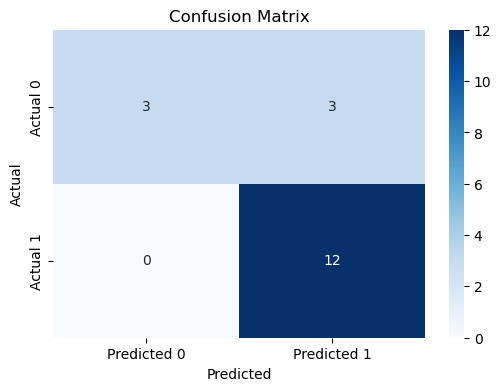

In [36]:
#confusion matrix
yhat_KNN = KNN_CV.predict(X_test)

cm_KNN = confusion_matrix(y_test, yhat_KNN)

#plot the confusion matrix
plt.figure(figsize = (6,4))
sns.heatmap(cm_KNN, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()